Name - Yash Panchal

NUID - 002771456

# Abstract

The dataset I'm using is taken from Kaggle. For this section we are using two different dataset 
1. NYC Airbnb Open data set.
2. Bank Customer Churn Dataset.

In NYC data set there are total 16 columns and in Bank Customer Churn Dataset there are total 12 columns.


# Data Set of NYC


The Data set consist of :

*   There are 16 columns 

*   Price column - is an Target Variable (Dependent Variable)

*   Rest 15 column acts as Independent Variable

# Importing the Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import shap
import sklearn
import random
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# What are you doing? What is the Question

I'm implementing various data cleaning and preprocessing techniques to make the dataset ready to be used for further Analysis.

Data Cleaning is the very important task before starting with any type of analysis as it helps us to ensure that the data is consistent and accurate because it removes any type of anomalies which will have an affect in our analysis.

# Where is Data?

The data set which we will be using in our analysis is taken from Kaggle. But a source of data can be multiple like web scraping, database etc. So, it becomes very important to study the data and accoringly take the step in data cleaning.

# Importing Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/panchalyash218/INFO6105/main/AB_NYC_2019.csv")

# Reading the Data after Importing

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Checking the number of instances and columns 

In [ ]:
df.shape

(48895, 16)

# Summary of all the Columns

In [ ]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


As we have some columns with character value that is why we can see the mean, min, max etc for numerical columns and for rest all the columns it will show 'Nan'.

# Checking for null values and datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Observations 

*   We have columns with float, int, Object as datatype.
*   There are some null values in last_review, host_name, review_per_month etc.
*   There are some columns on which One hot encoding, cat coding done to change their data type from object to int 
 





# Dropping Unwanted Columns

We will first remove all the unwanted column which we wont be using in our Analysis this is also an very step in Data cleaning process by dropping the unwanted column we can save memory and run time decreases and also reduce noise of the data (number of columns reduces).

In [ ]:
df.drop([ 'minimum_nights',  'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], axis=1, inplace=True)

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80


# Converting the Datatype of the columns

We will first change data type of name column

In [ ]:
df.name.unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

As name column has a lot of unique values so performing One Hot Encoding would not be preferable so we will perform Cat Coding here.

In [ ]:
##############CAT CODES for CATEGORY##########################
df['namecode'] = df['name'].astype('category').cat.codes

In [ ]:
df.drop(['name'], axis=1, inplace=True)

In [ ]:
df.head(5)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,namecode
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,12328
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,37455
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,43543
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,14783
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,18693


Similarly, we will check for host_name column

In [ ]:
df.host_name.unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

As we can see that the host_name column also have a lot of unique values so we will perform cat coding here.

In [ ]:
##############CAT CODES for CATEGORY##########################
df['host_namecode'] = df['host_name'].astype('category').cat.codes

In [ ]:
df.drop(['host_name'], axis=1, inplace=True)

In [ ]:
df.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,namecode,host_namecode
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,12328,4989
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,37455,4785
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,43543,2909
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,14783,6203
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,18693,5923


Now, we will check for neighbourhood_group column

In [ ]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

As the column neighbourhood_group only has 5 unique values in it so we can perform One Hot Encoding here

In [ ]:
df = pd.get_dummies(df, columns=['neighbourhood_group'])

In [ ]:
df.head(5)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,namecode,host_namecode,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,2787,Kensington,40.64749,-73.97237,Private room,149,12328,4989,0,1,0,0,0
1,2595,2845,Midtown,40.75362,-73.98377,Entire home/apt,225,37455,4785,0,0,1,0,0
2,3647,4632,Harlem,40.80902,-73.94190,Private room,150,43543,2909,0,0,1,0,0
3,3831,4869,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,14783,6203,0,1,0,0,0
4,5022,7192,East Harlem,40.79851,-73.94399,Entire home/apt,80,18693,5923,0,0,1,0,0


Similarly, we will check for neighbourhood and room_type column

In [ ]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
##############CAT CODES for CATEGORY##########################
df['neighbourhoodcode'] = df['neighbourhood'].astype('category').cat.codes

In [ ]:
df.drop(['neighbourhood'], axis=1, inplace=True)

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['room_type'])

In [ ]:
df.head(5)

,id,host_id,latitude,longitude,price,namecode,host_namecode,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhoodcode,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,40.64749,-73.97237,149,12328,4989,0,1,0,0,0,108,0,1,0
1,2595,2845,40.75362,-73.98377,225,37455,4785,0,0,1,0,0,127,1,0,0
2,3647,4632,40.80902,-73.94190,150,43543,2909,0,0,1,0,0,94,0,1,0
3,3831,4869,40.68514,-73.95976,89,14783,6203,0,1,0,0,0,41,1,0,0
4,5022,7192,40.79851,-73.94399,80,18693,5923,0,0,1,0,0,61,1,0,0


In [ ]:
df.dtypes

id                                     int64
host_id                                int64
latitude                             float64
longitude                            float64
price                                  int64
namecode                               int32
host_namecode                          int16
neighbourhood_group_Bronx              uint8
neighbourhood_group_Brooklyn           uint8
neighbourhood_group_Manhattan          uint8
neighbourhood_group_Queens             uint8
neighbourhood_group_Staten Island      uint8
neighbourhoodcode                      int16
room_type_Entire home/apt              uint8
room_type_Private room                 uint8
room_type_Shared room                  uint8
dtype: object

We have succesfully changed the data type of all the columns 

# Checking for Null Values in any Columns

In [ ]:
df.isnull().sum()

id                                   0
host_id                              0
latitude                             0
longitude                            0
price                                0
namecode                             0
host_namecode                        0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
neighbourhoodcode                    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

Our dataset has No Null value.

# Check the likely Distribution 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



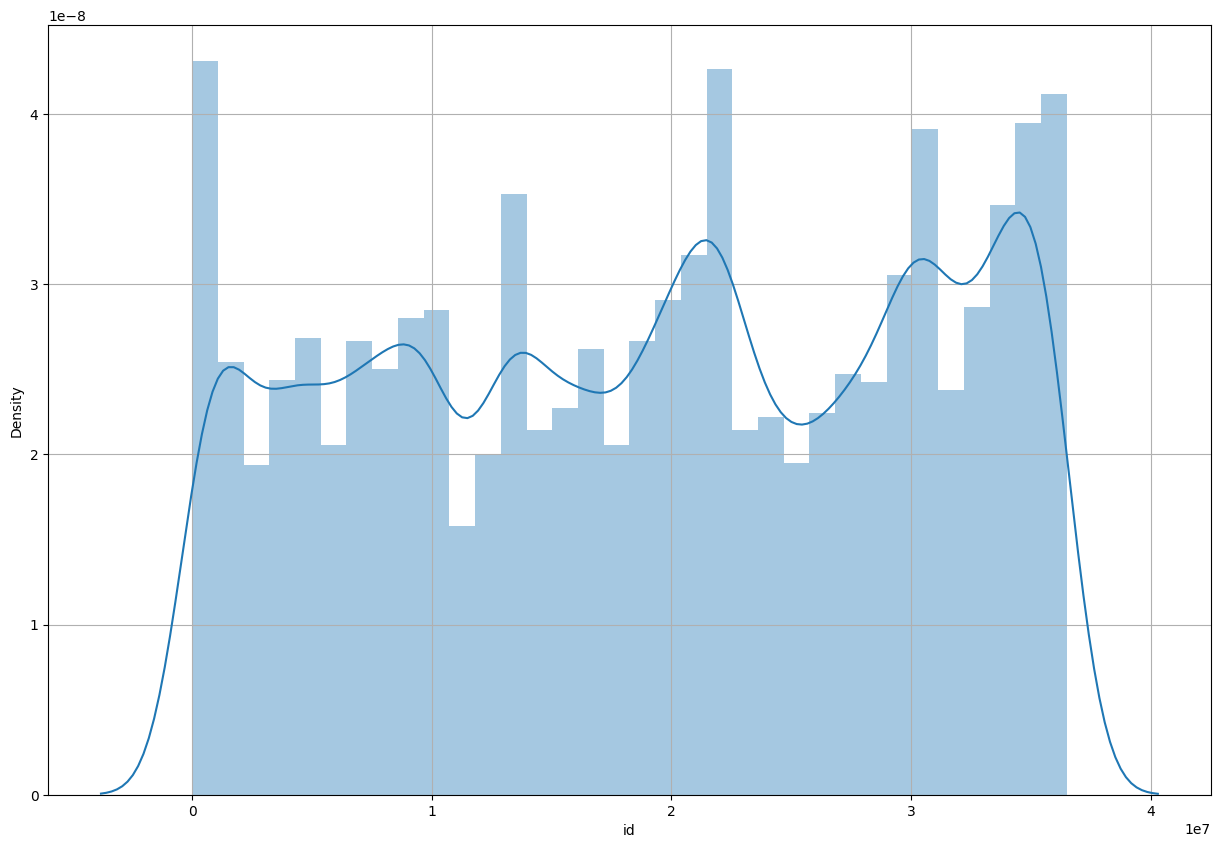



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



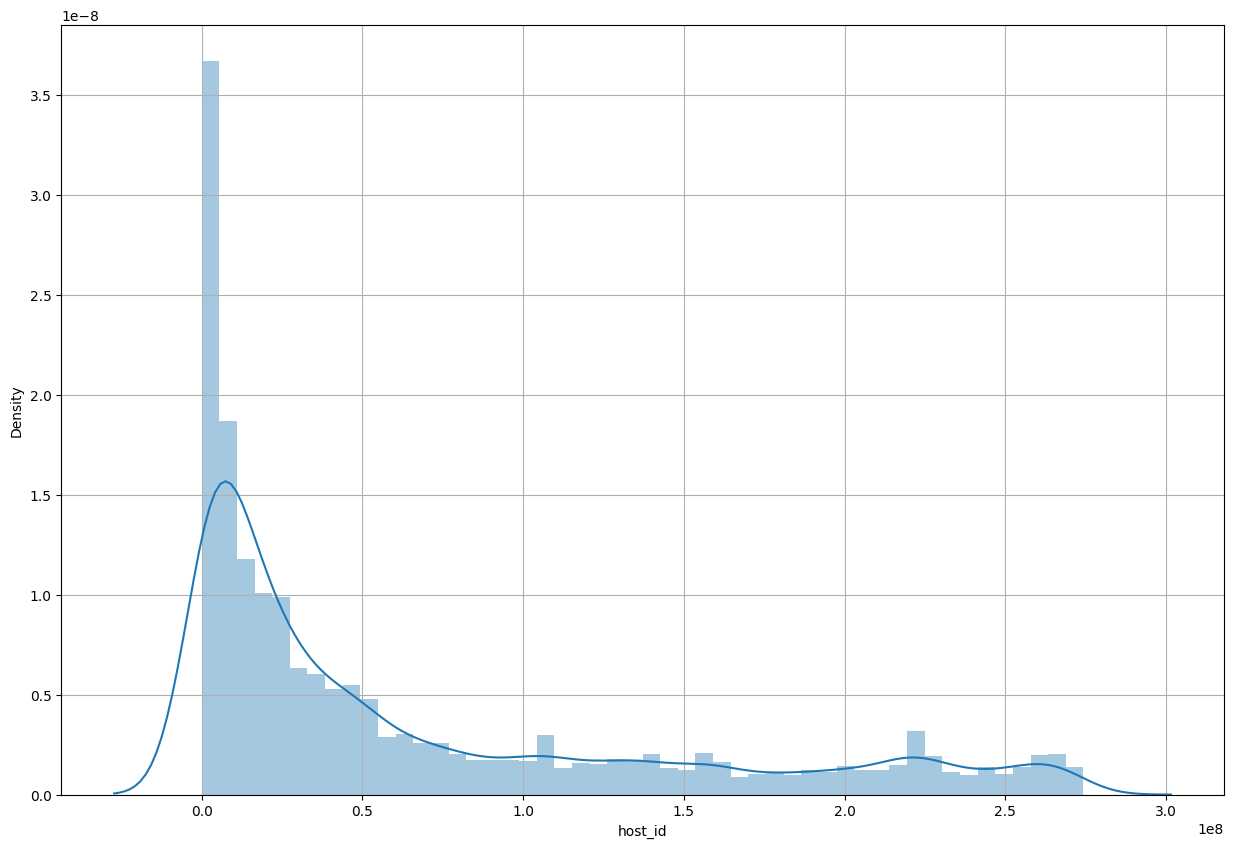



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



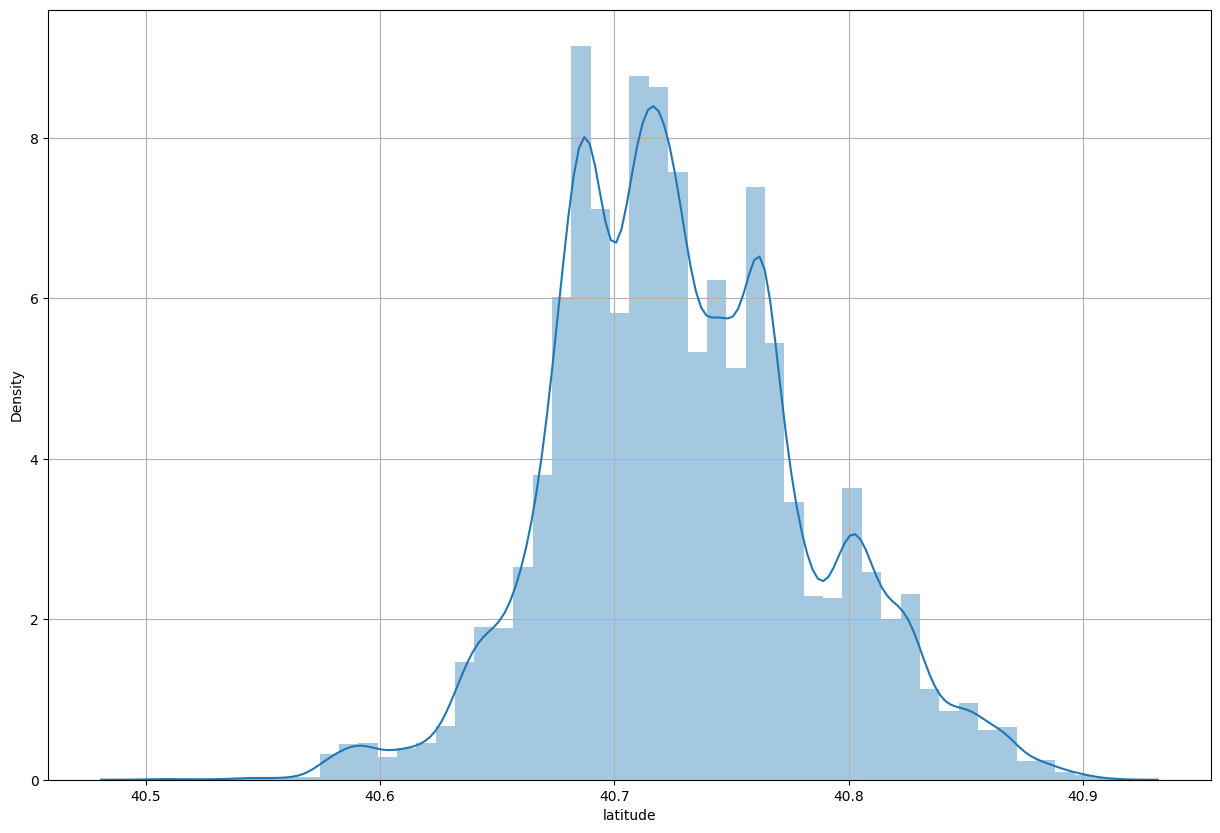



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



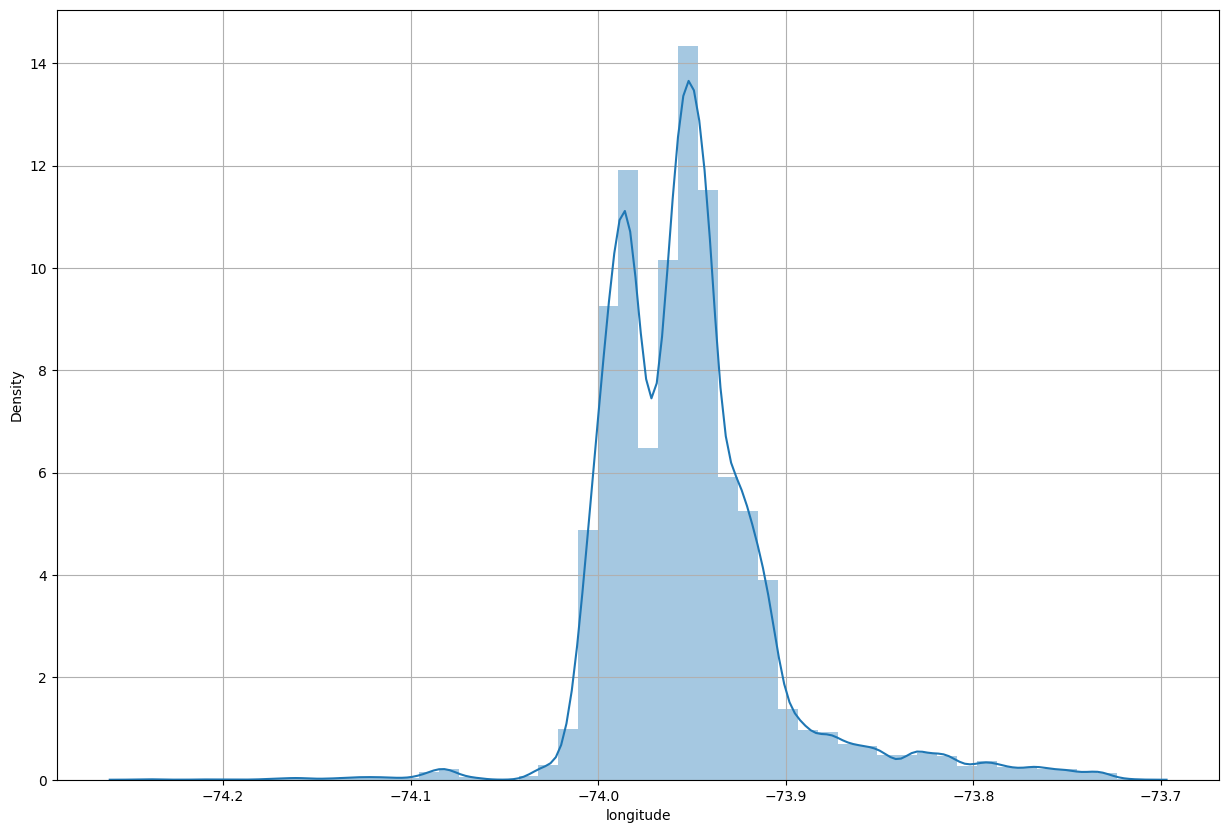



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



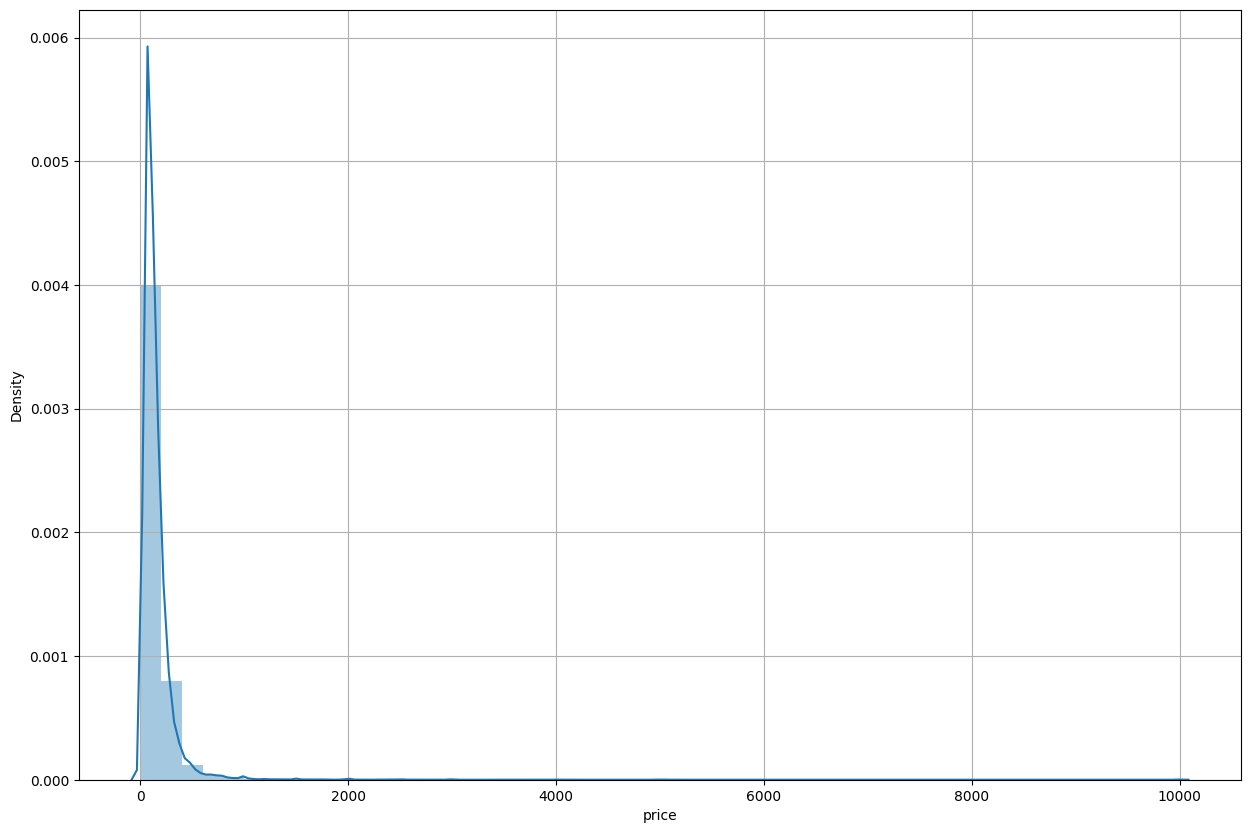



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



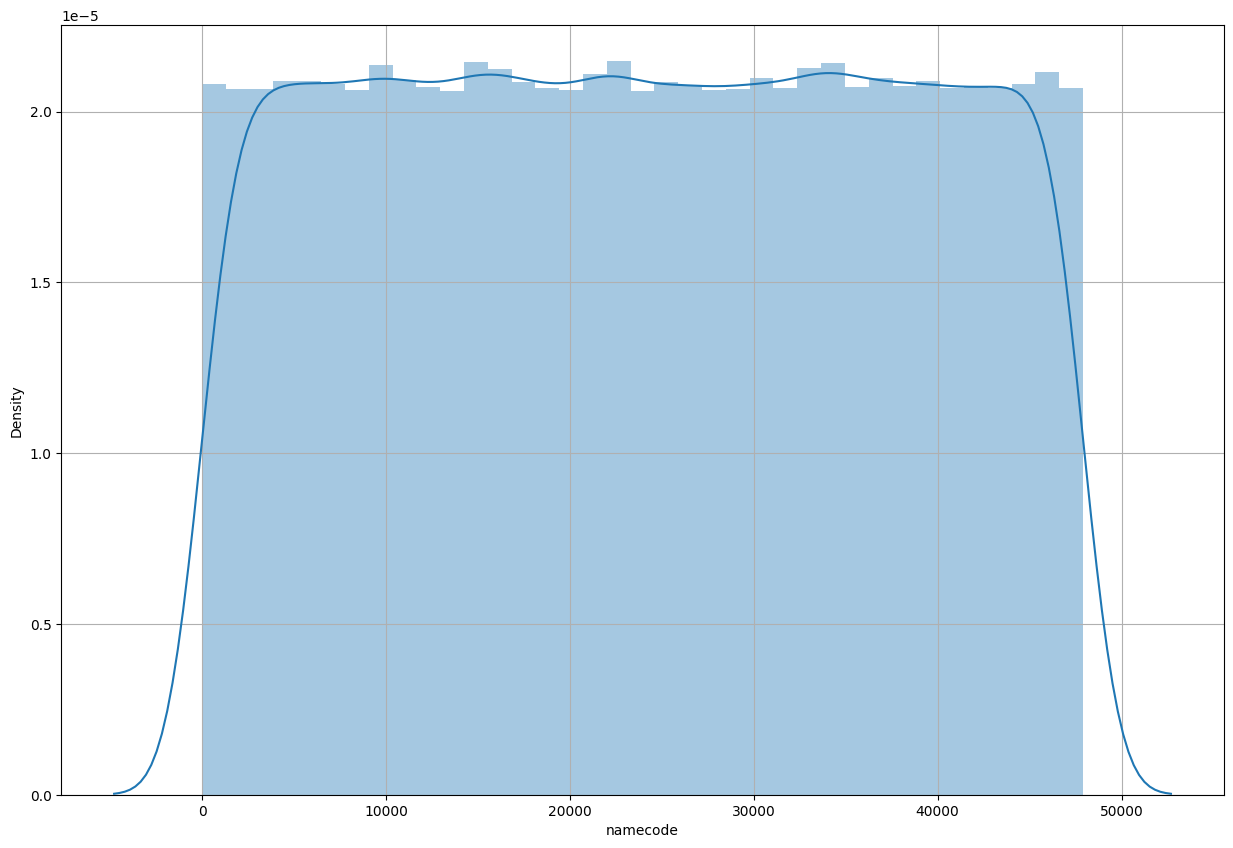



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



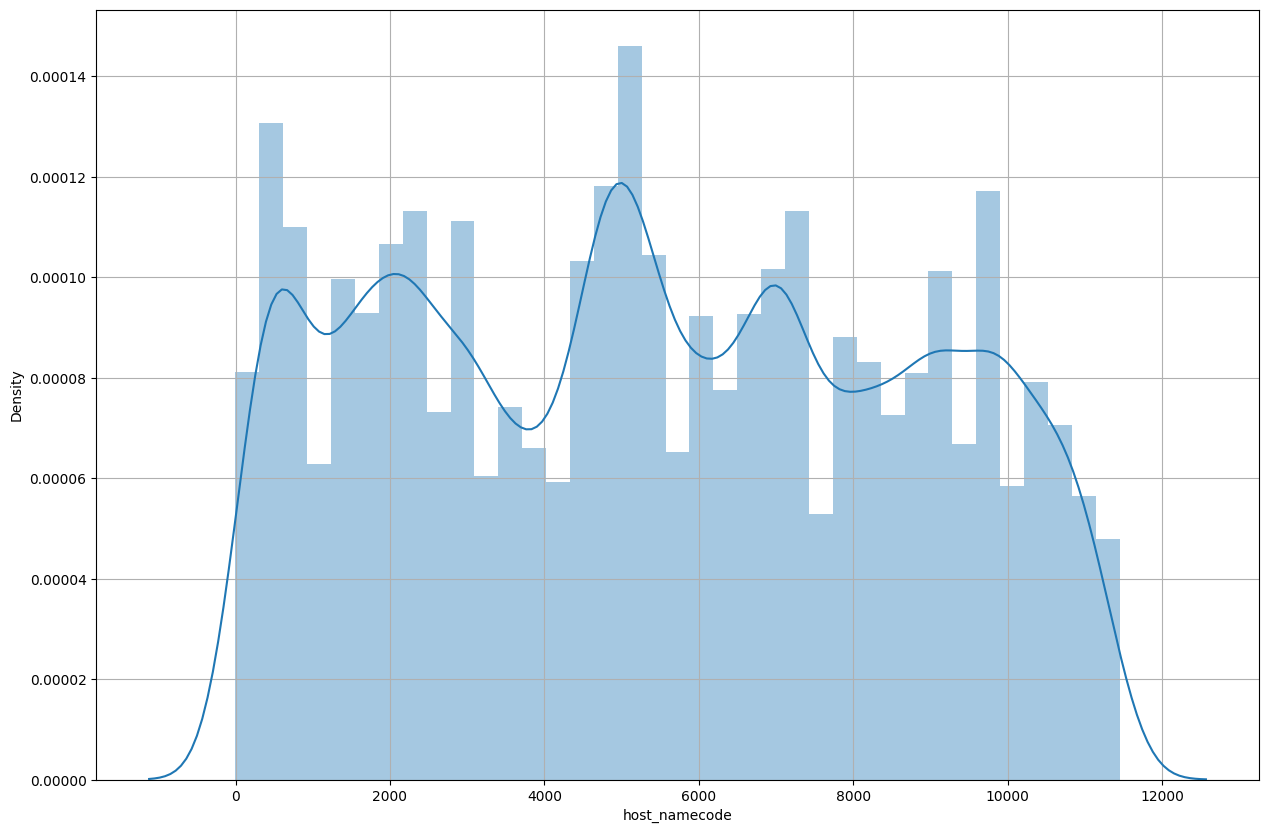



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



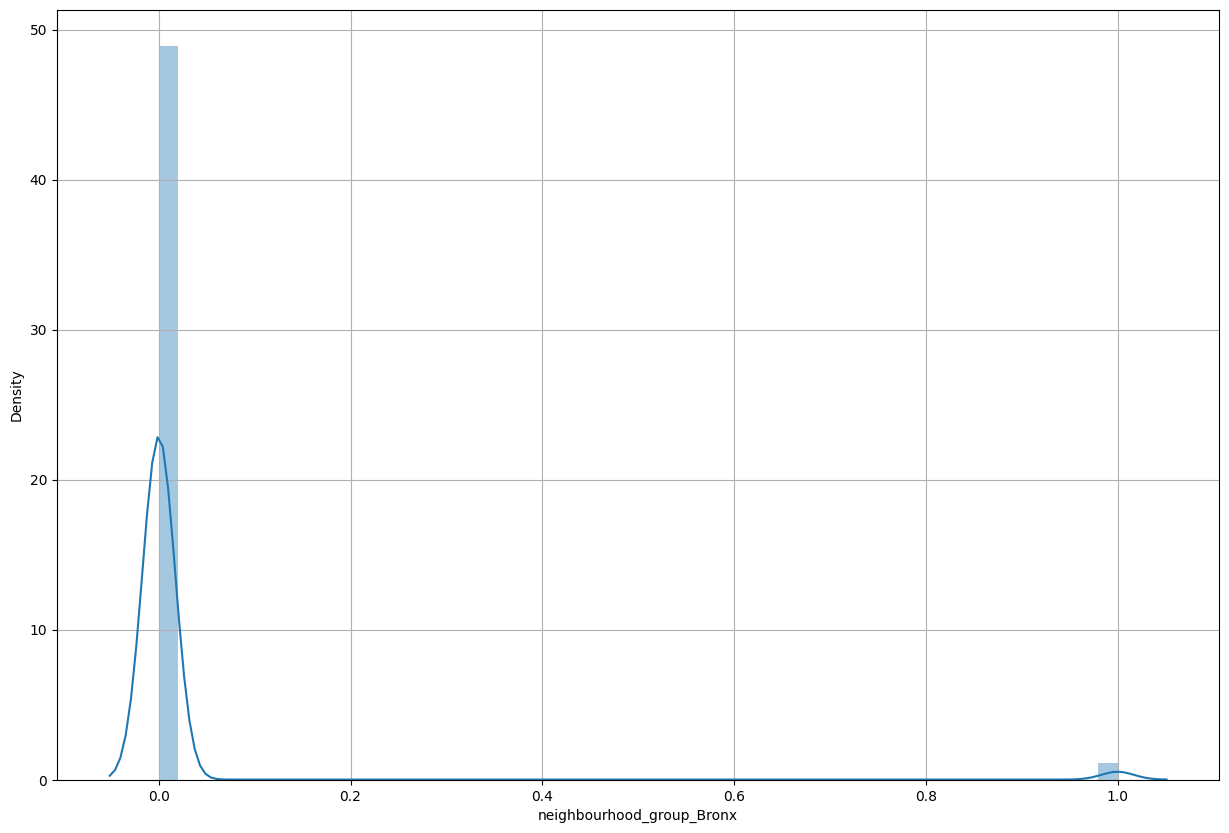



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



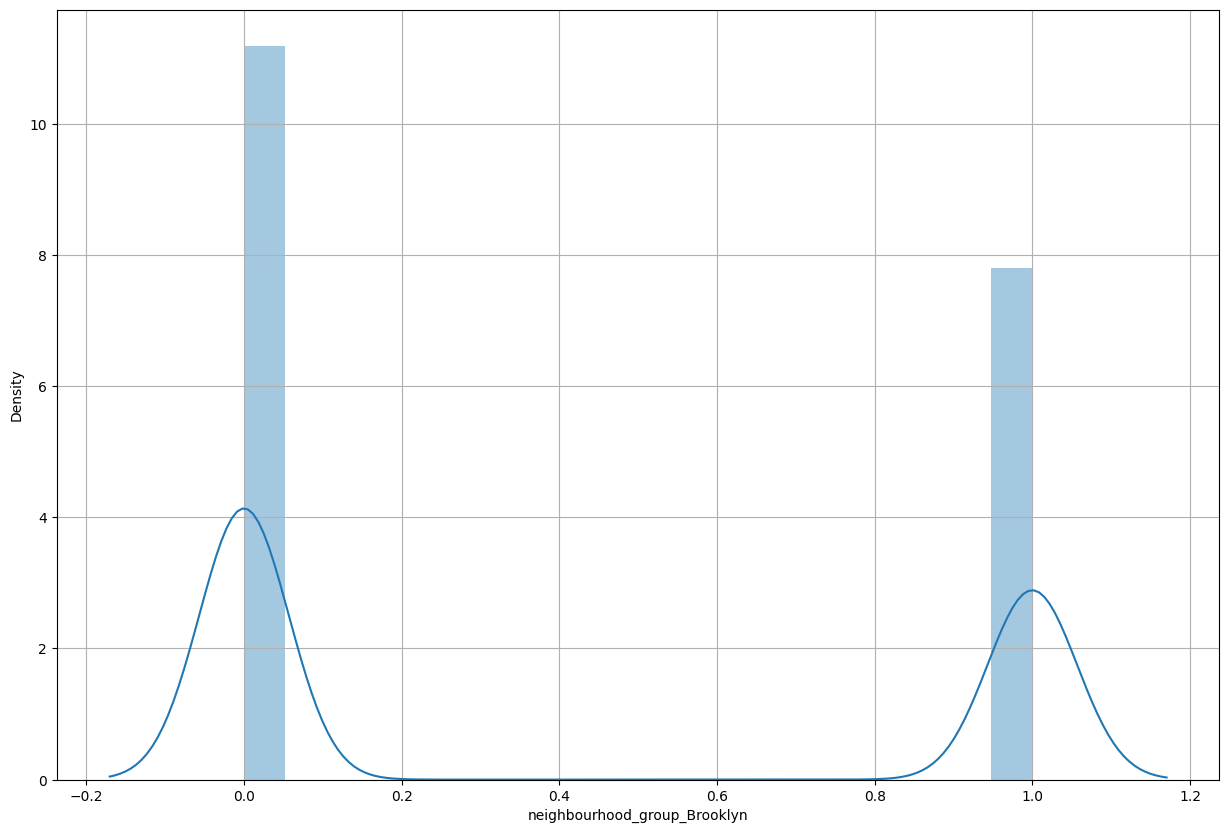



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



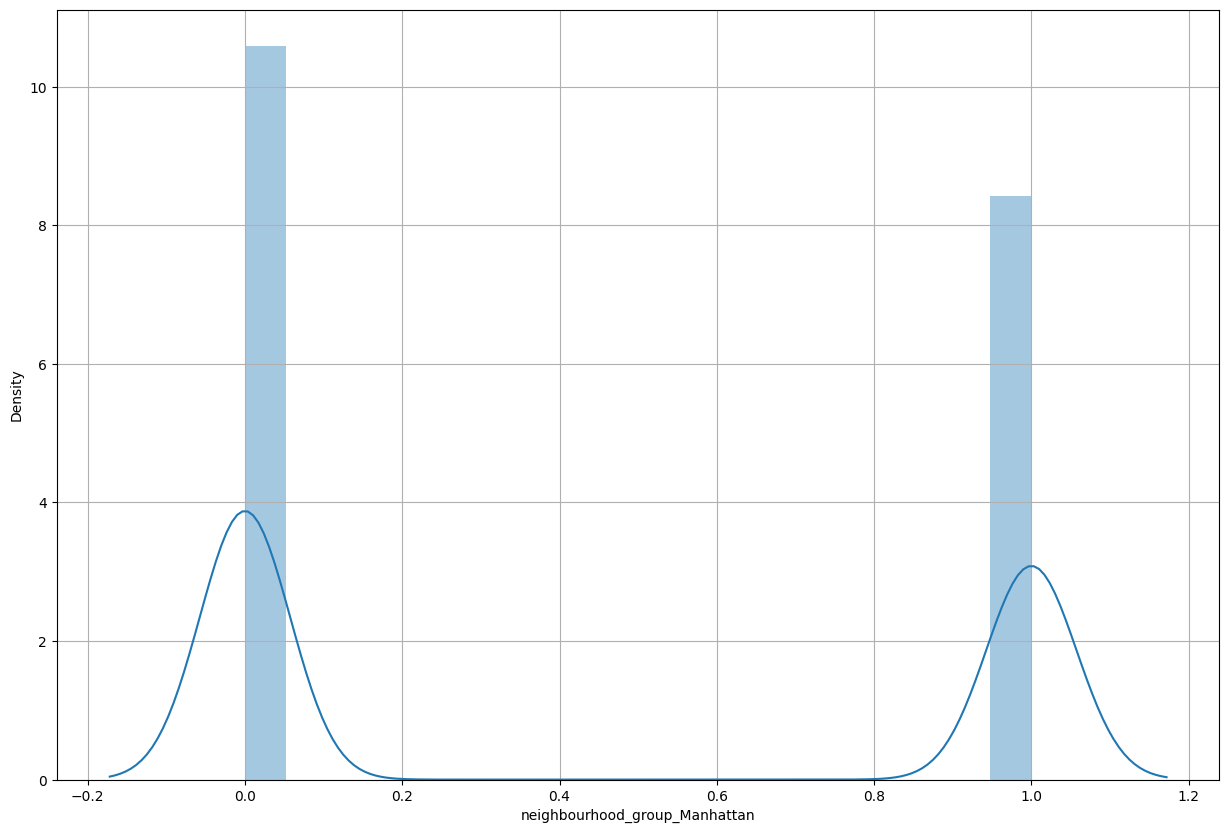



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



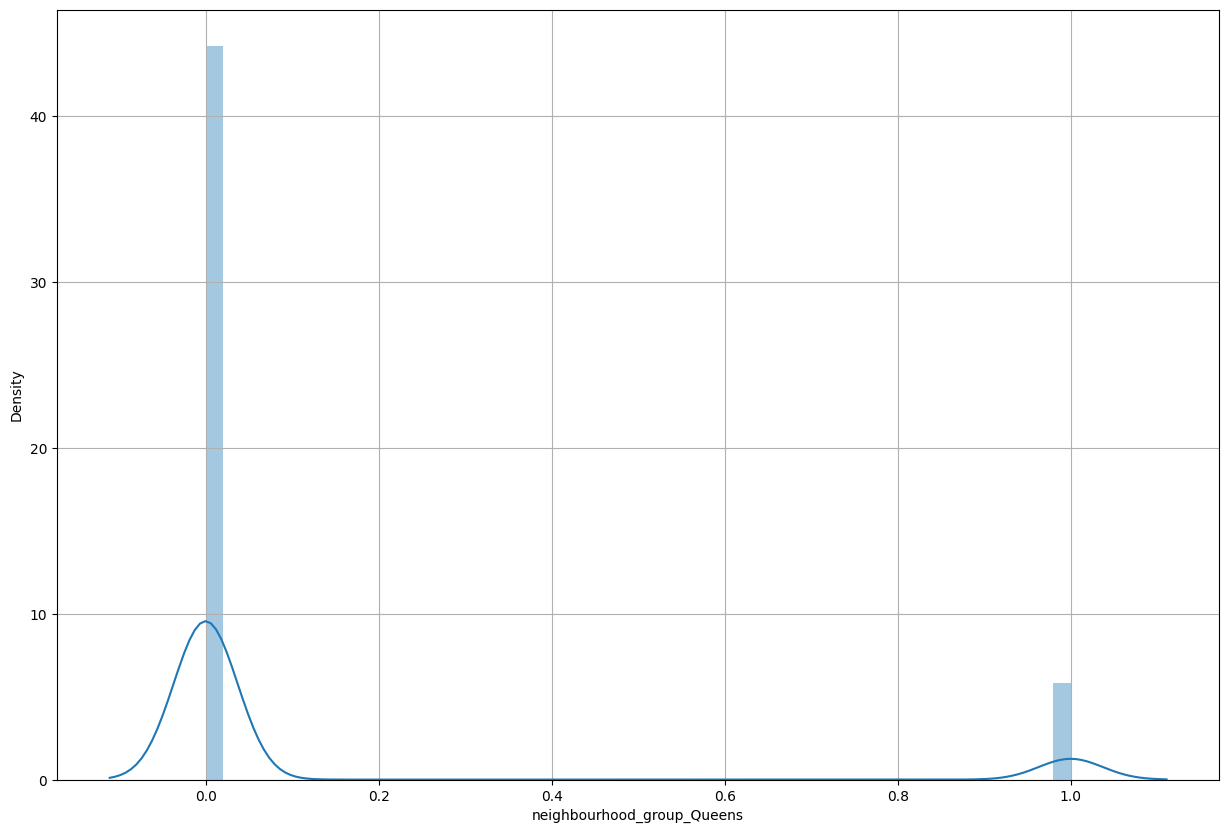



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



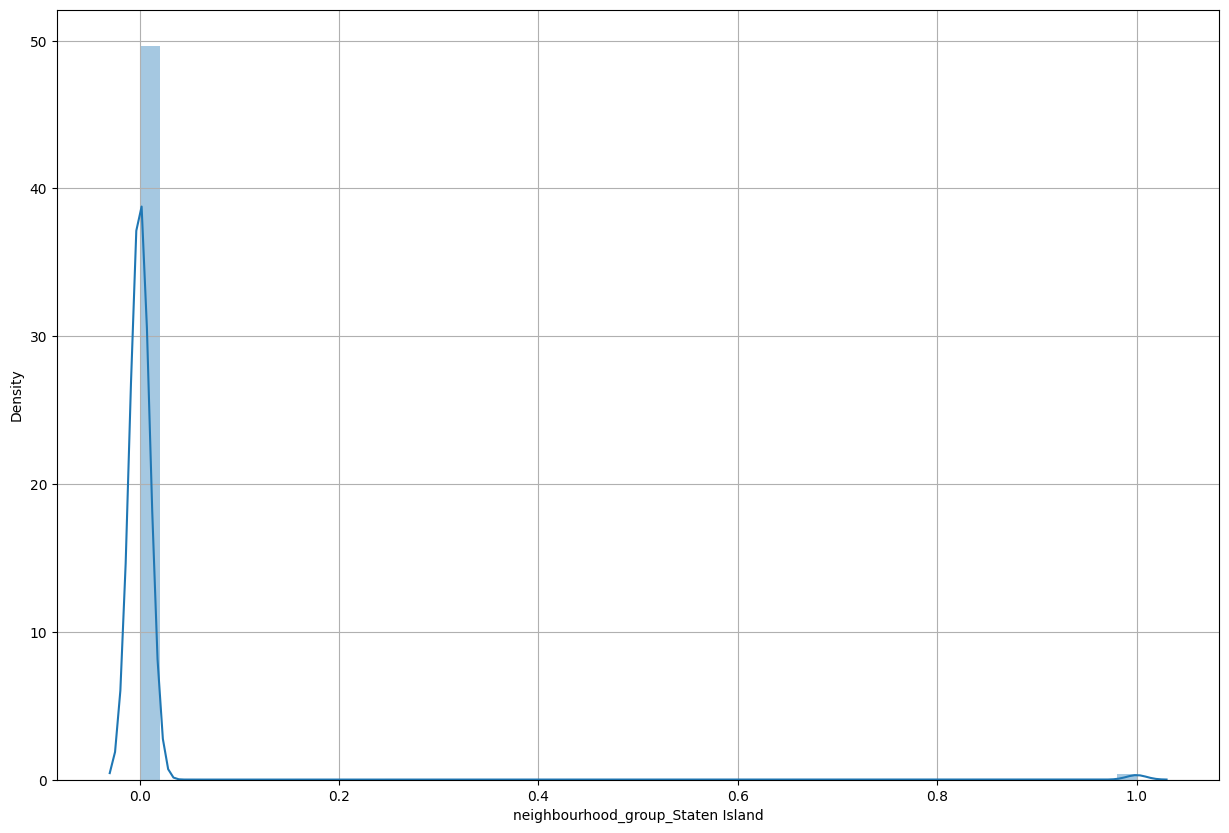



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



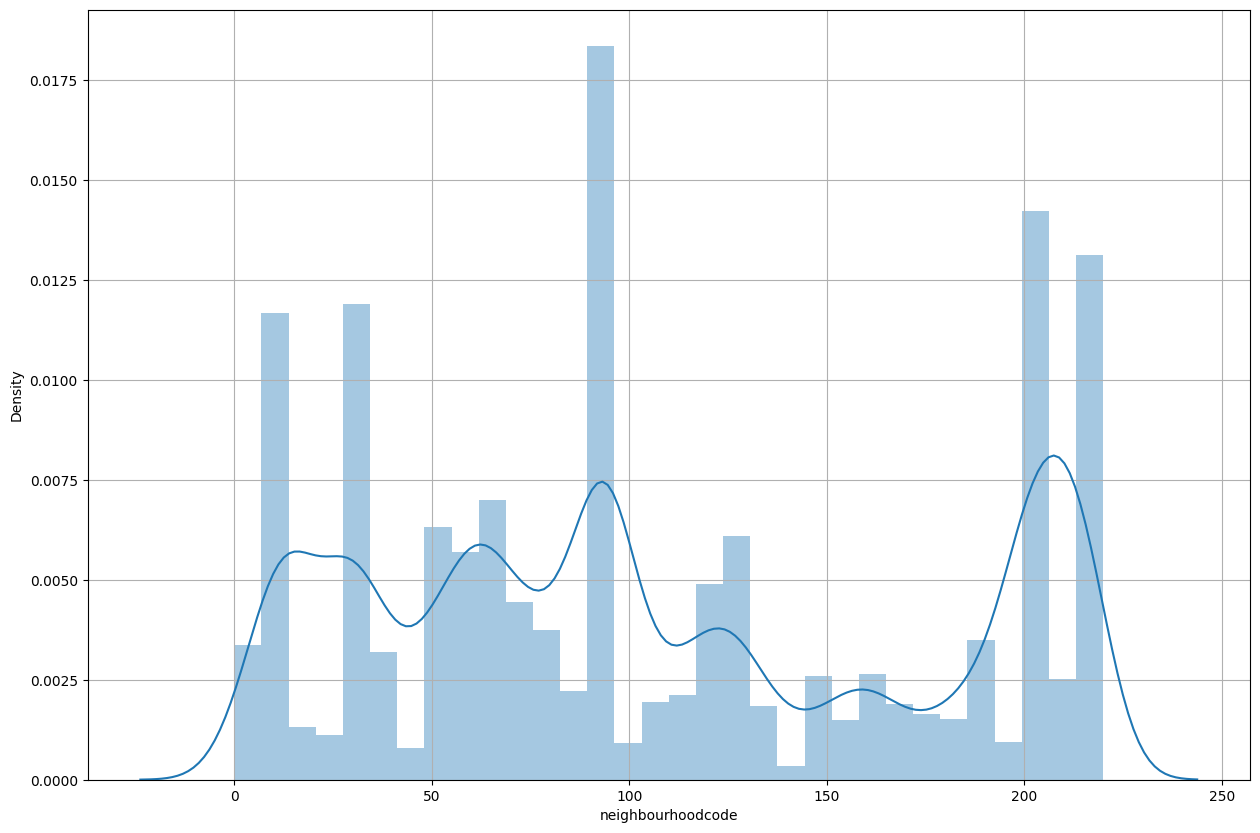



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



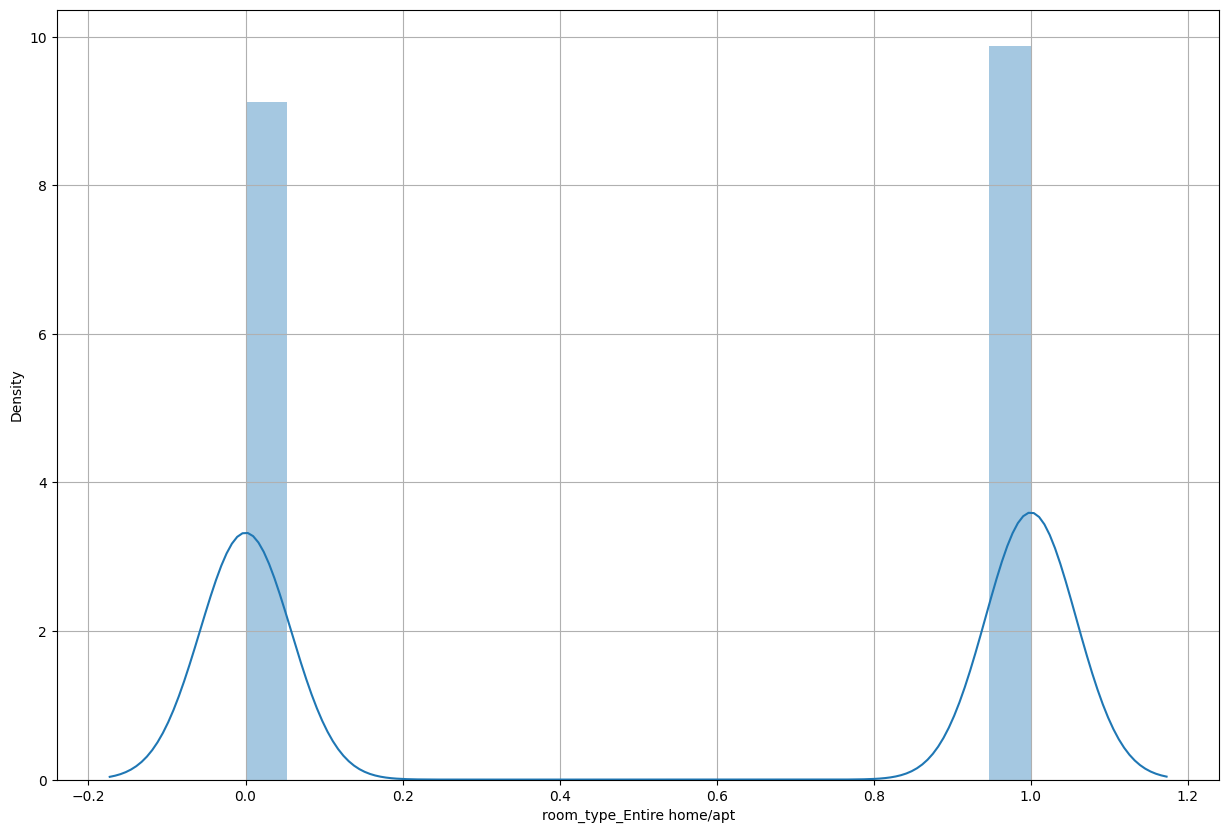



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



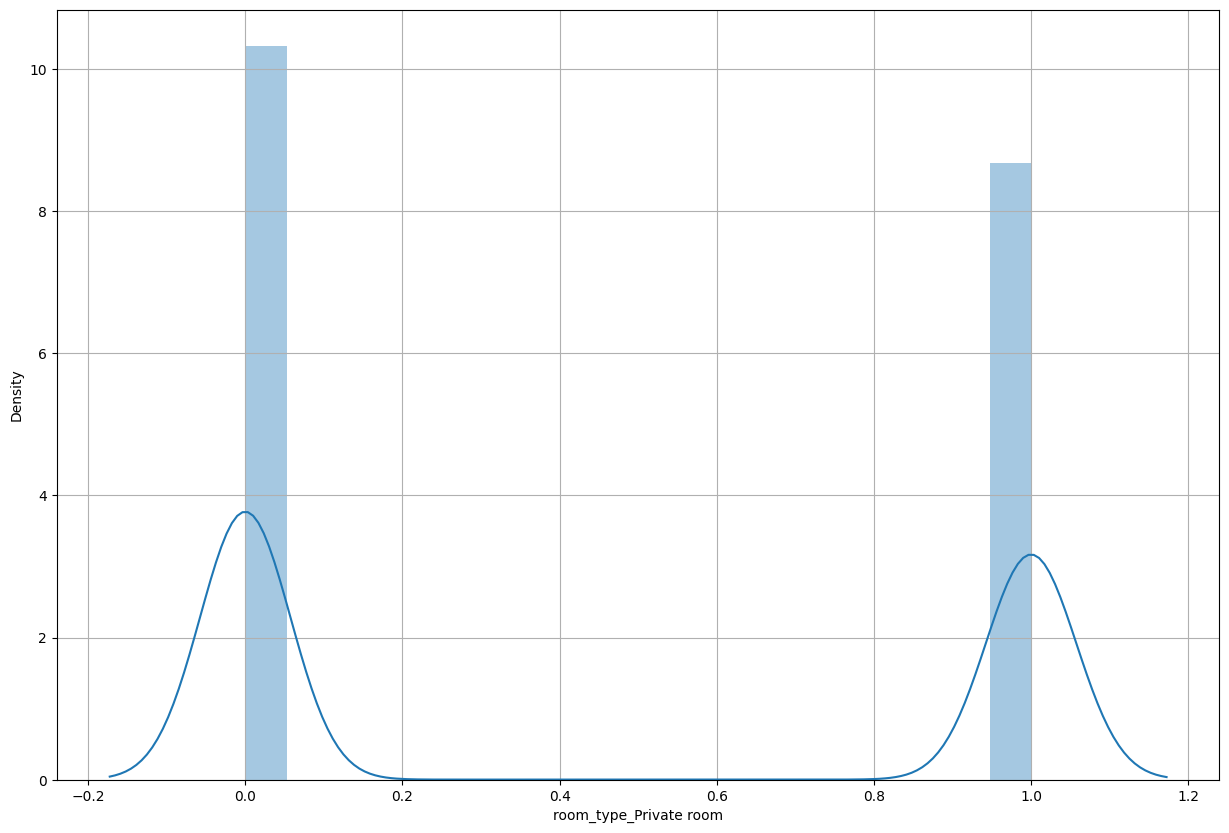



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



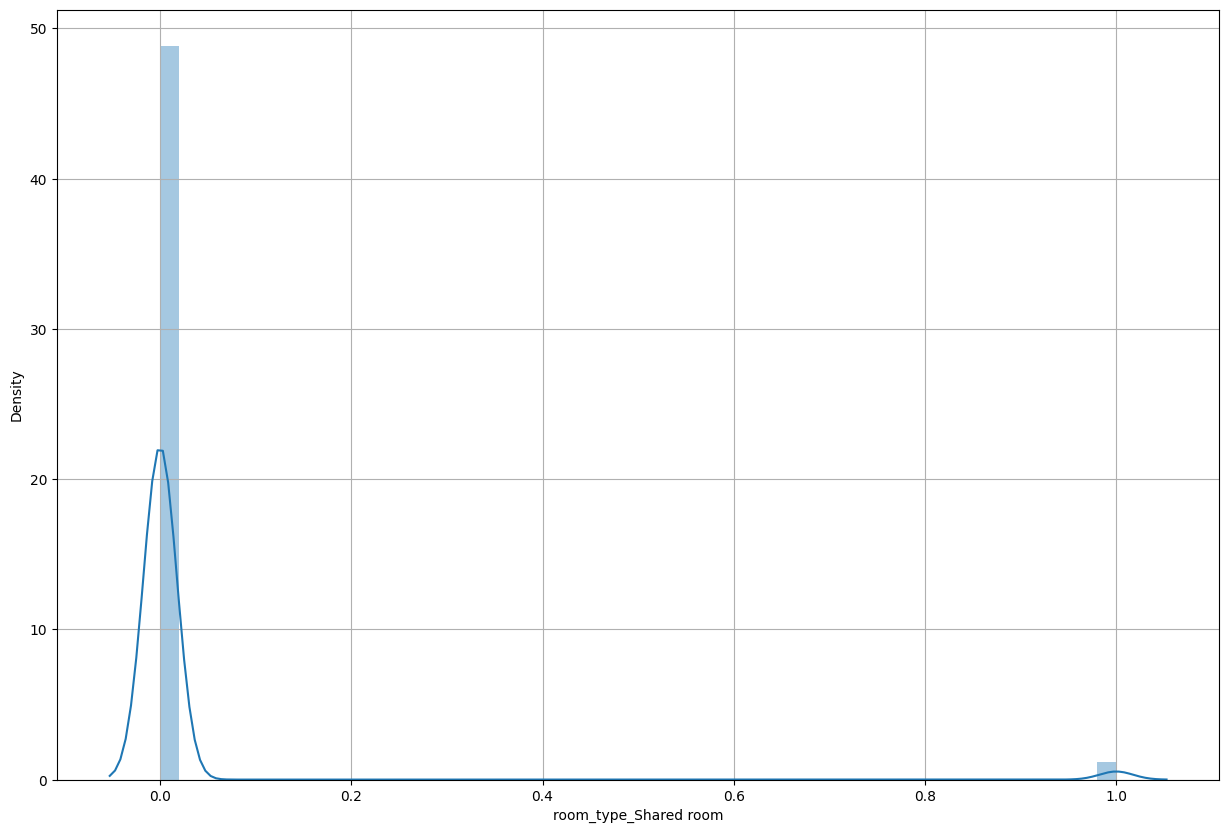

In [ ]:
List =['id', 'host_id', 'latitude', 'longitude', 'price', 'namecode', 'host_namecode', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'neighbourhoodcode', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']
def distribution(data,list):
  sns.distplot(data[list])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(df,i)
  plt.show()

# Correlation between the attributes

<Axes: >

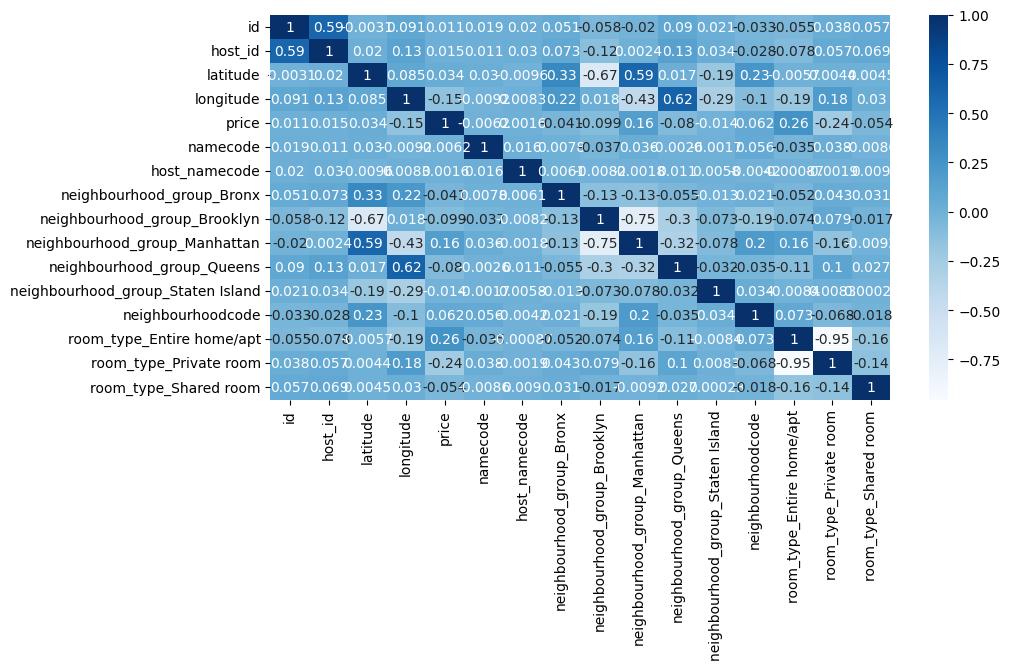

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.heatmap(
    df.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

From the above heatmap we can conclude that highest correlation between the attributes is between host_id and id = 0.59, longitude and neighbourhood_group_queen = 0.62

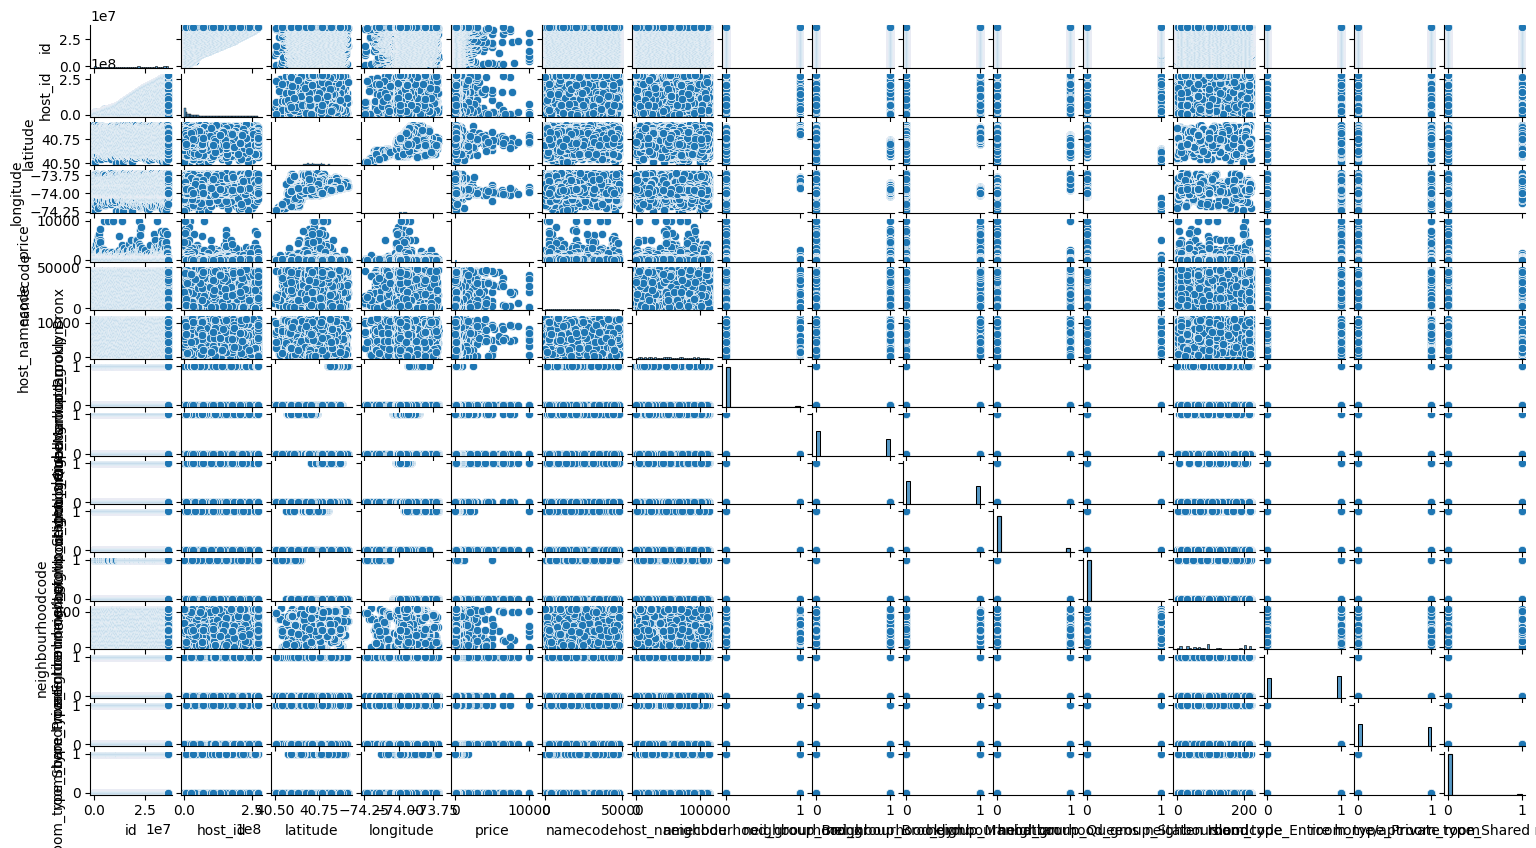

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
g = sns.pairplot(df)
g.fig.set_size_inches(15,8)

# Spliting Training and Testing Columns

We will split our dataset in Test and Train for further analysis

In Y-axis we will have out Target variable(i.e Price) and rest all columns will be in X-axis

In [ ]:
X = df.drop(["price"], axis=1)  # Training Feature
Y = df["price"]  # Target

In [ ]:
print(X.head())

     id  host_id  latitude  longitude  namecode  host_namecode  \
0  2539     2787  40.64749  -73.97237     12328           4989   
1  2595     2845  40.75362  -73.98377     37455           4785   
2  3647     4632  40.80902  -73.94190     43543           2909   
3  3831     4869  40.68514  -73.95976     14783           6203   
4  5022     7192  40.79851  -73.94399     18693           5923   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1      

In [ ]:
print(Y.head())

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64


The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

# model = sm.OLS(y_train['Installs'], x_train[[ 'CategoryCode','Rating', 'Size', 'Reviews', 'Price','Type_0','Type_Free','Type_Paid','Content_Rating_Everyone','Content_Rating_Teen','Content_Rating_Unrated']]).fit()
model = sm.OLS(y_train, x_train).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     337.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:41:11   Log-Likelihood:            -3.0139e+05
No. Observations:               44005   AIC:                         6.028e+05
Df Residuals:                   43991   BIC:                         6.029e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
id                                 2.766e-07   1.23e-07      2.256      0.024    3.62e-08    5.17e-07
host_id                             1.08e-07   1.74e-08      6.215      0.000    7.39e-08    1.42e-07
latitude                           -270.7973     33.518     -8.079      0.000    -336.493    -205.102
longitude                          -472.7770     38.025    -12.433      0.000    -547.307    -398.247
namecode                             -0.0001    7.9e-05     -1.453      0.146      -0.000       4e-05
host_namecode                         0.0002      0.000      0.528      0.598      -0.000       0.001
neighbourhood_group_Bronx         -8906.9165   1280.484     -6.956      0.000   -1.14e+04   -6397.145
neighbourhood_group_Brooklyn      -8952.0609   1279.459     -6.997      0.000   -1.15e+04   -6444.299
neighbourhood_group_Manhattan     -8886.2546   1281.834     -6.932      0.000   -1.14e+04   -6373.837
neighbourhood_group_Queens        -8921.9988   1277.697     -6.983      0.000   -1.14e+04   -6417.689
neighbourhood_group_Staten Island -9067.0886   1283.423     -7.065      0.000   -1.16e+04   -6551.557
neighbourhoodcode                     0.1028      0.017      6.219      0.000       0.070       0.135
room_type_Entire home/apt         -1.483e+04   2134.331     -6.949      0.000    -1.9e+04   -1.06e+04
room_type_Private room            -1.494e+04   2134.235     -6.999      0.000   -1.91e+04   -1.08e+04
room_type_Shared room             -1.497e+04   2134.249     -7.012      0.000   -1.91e+04   -1.08e+04
==============================================================================
Omnibus:                    98322.213   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        818316495.989
Skew:                          20.935   Prob(JB):                         0.00
Kurtosis:                     669.746   Cond. No.                     8.44e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# P-Values
If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

namecode and host_namecode 

These variables have P-Value more than 0.05, hence it can be interpreted that these variables are non-significant variables and any change to this variables does not have significant impact on the target (price).

# Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 20.935, 669.746 respectively.

# Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected

Value between 0 to 2 indicates that there is positive auto correlation detected

Value between 2 to 4 indicates that there is negative auto correlation detected

Our model has a DW score of 1.996 which could be interpreted as a Positive auto-correlation in the residuals of regression.

# Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 818316495.988 which again re-inforces the interpretation we got from Skew and Kurtosis.

# Fit Tree Based Model

As, I trying using RandomForestRegressor model in my dataset but the squared_error value came out very vague so below I'm also showing decisiontree method to show the best accuracy for my dataset and as we can see below Decision Tree classifier gives has the accuracy of 7.69%

In [ ]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 7.69%


In [ ]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

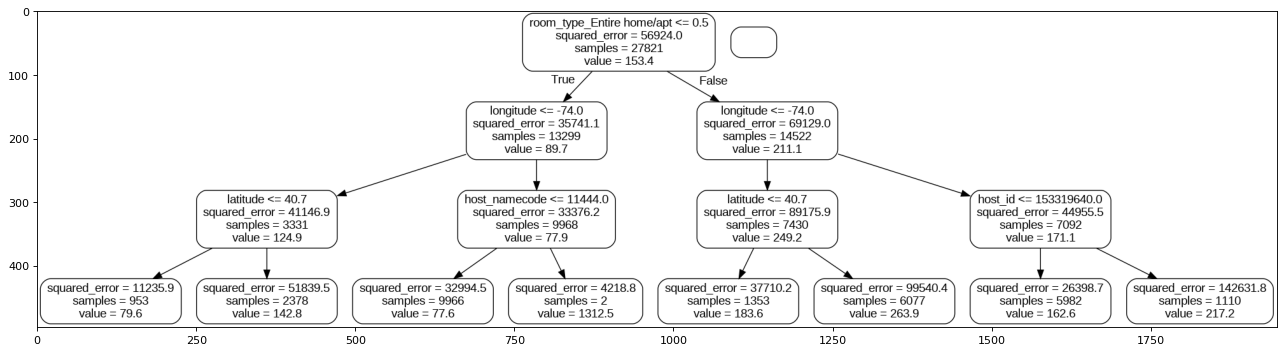

In [ ]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(20, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# Bank Customer Churn Dataset


The Data set consist of :

*   There are 12 columns 

*   Churn column - is an Target Variable (Dependent Variable)

*   Rest 11 column acts as Independent Variable

# Importing Dataset

In [ ]:
new_df = pd.read_csv("https://raw.githubusercontent.com/panchalyash218/INFO6105/main/Bank%20Customer%20Churn%20Prediction.csv")

# Reading the Data after Importing

In [ ]:
new_df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking the number of instances and columns 

In [ ]:
new_df.shape

(10000, 12)

# Summary of all the Columns

In [ ]:
new_df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


As we have character value in Country and gender that is why we can see the mean, min, max etc for numerical columns and for character columns it will show 'Nan'.

# Checking for null values and datatypes

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Observations 

*   We have two column with object as datatype rest all are int or float.
*   There are no null values in the dataset

 





# Converting the Datatype of the columns

We will try to convert the datatype of country and gender. 

First we will check how many unique values it has in the columns if the unique values are around 4 or 5 then we will perform One Hot Encoding or else we will use Cat Coding to convert the data type to int

In [ ]:
new_df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
new_df = pd.get_dummies(new_df, columns=['country'])

In [ ]:
new_df.head(5)

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
new_df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
new_df = pd.get_dummies(new_df, columns=['gender'])

In [ ]:
new_df.head(5)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


We have succesfully converted the Datatype of both the columns

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_France    10000 non-null  uint8  
 11  country_Germany   10000 non-null  uint8  
 12  country_Spain     10000 non-null  uint8  
 13  gender_Female     10000 non-null  uint8  
 14  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(5)
memory usage: 830.2 KB


# Check the likely Distribution 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



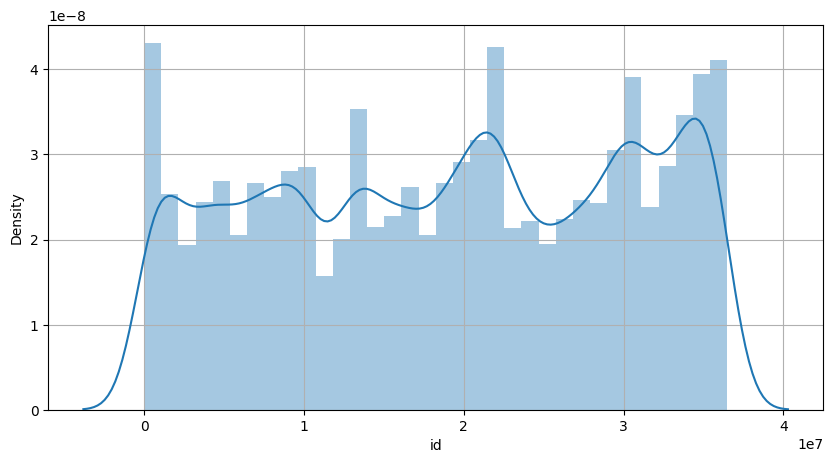



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



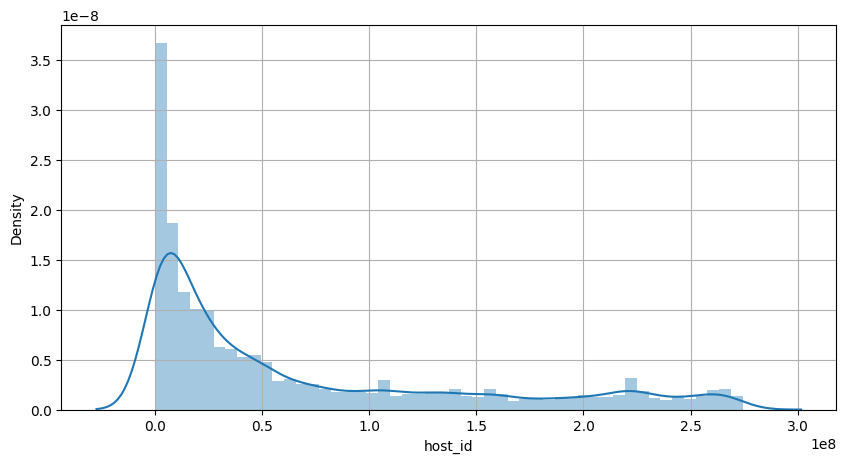



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



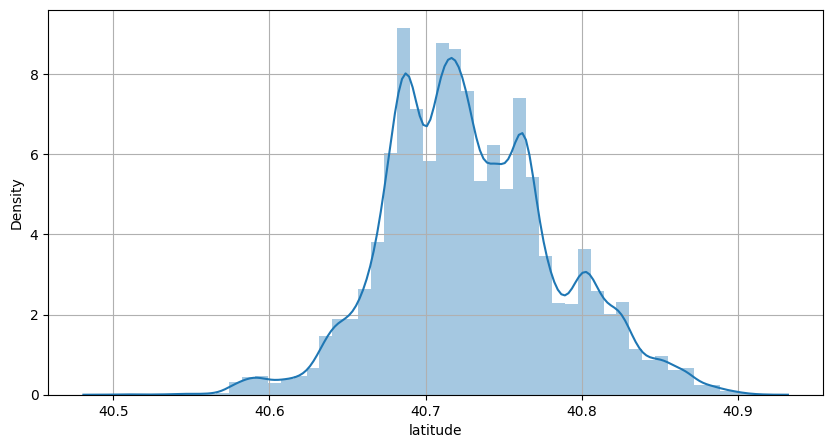



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



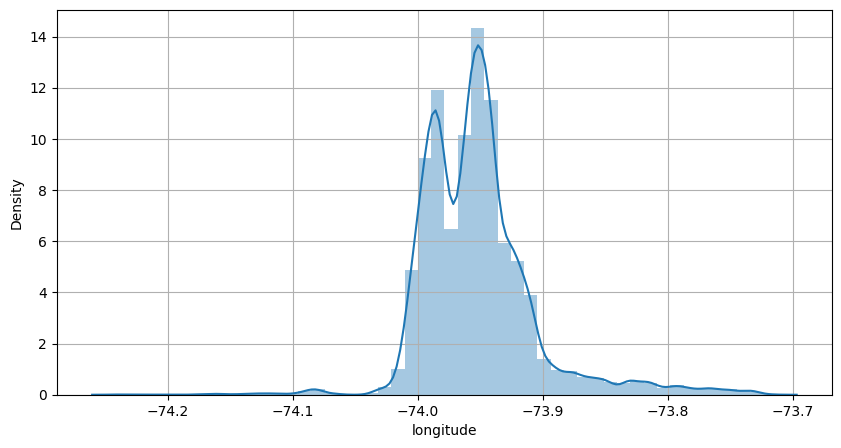



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



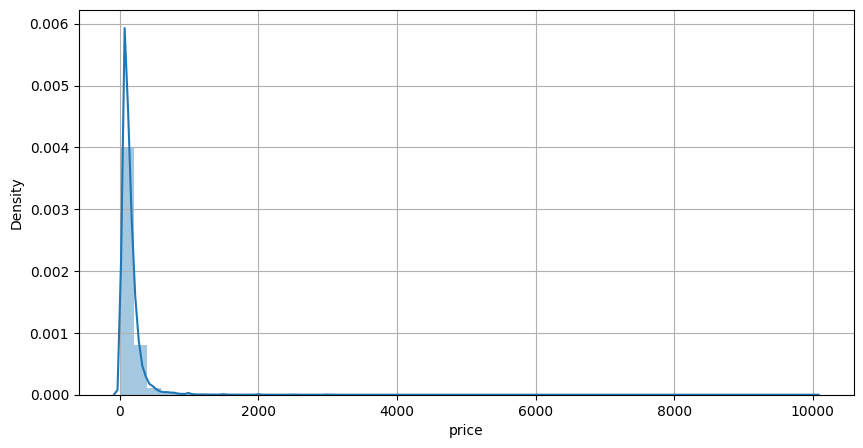



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



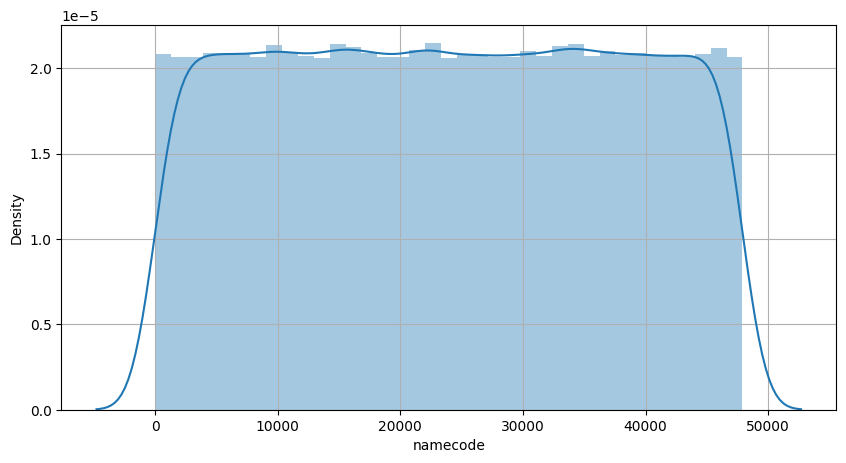



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



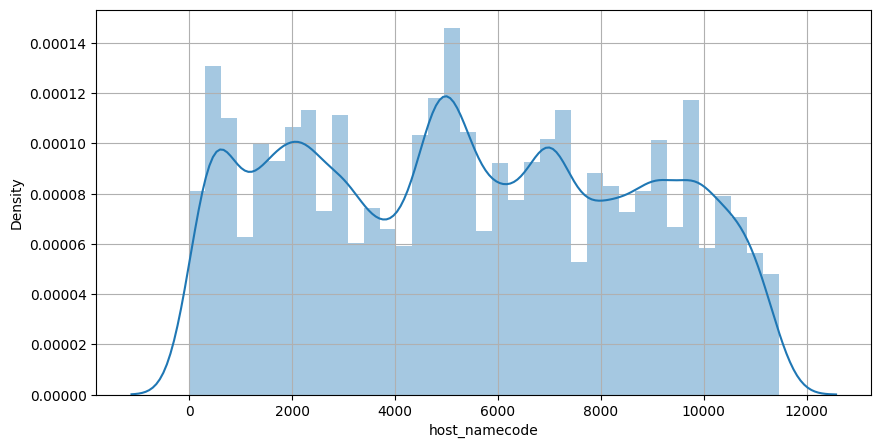



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



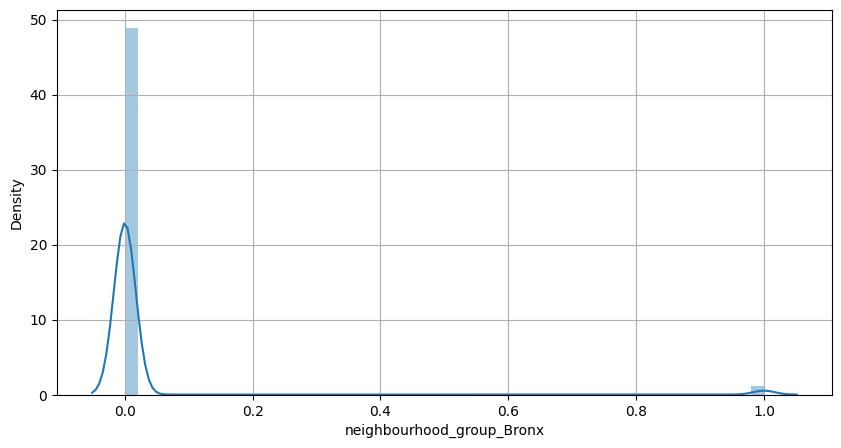



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



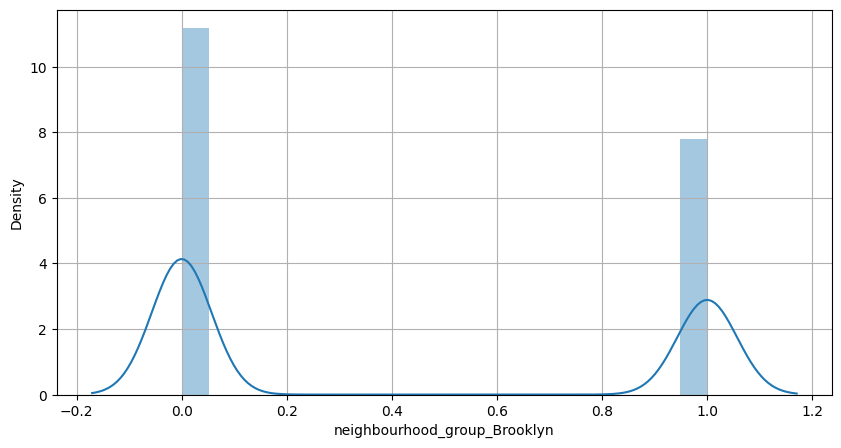



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



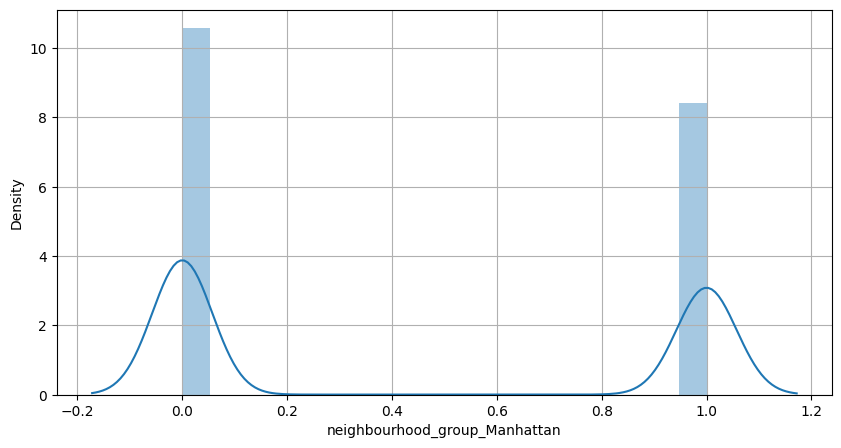



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



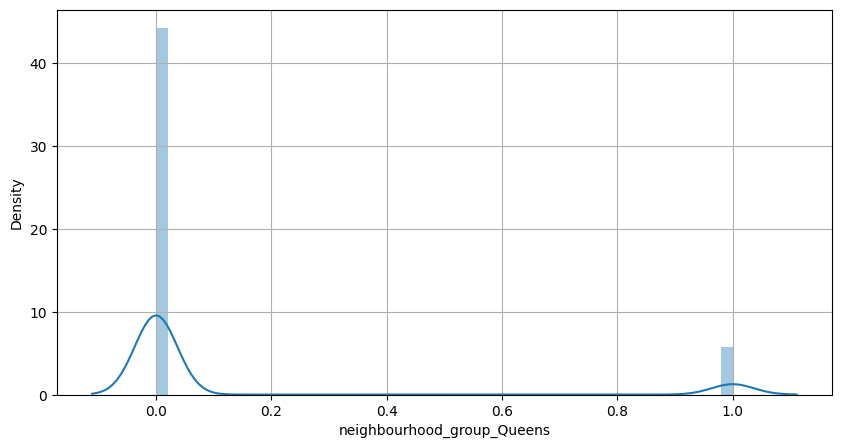



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



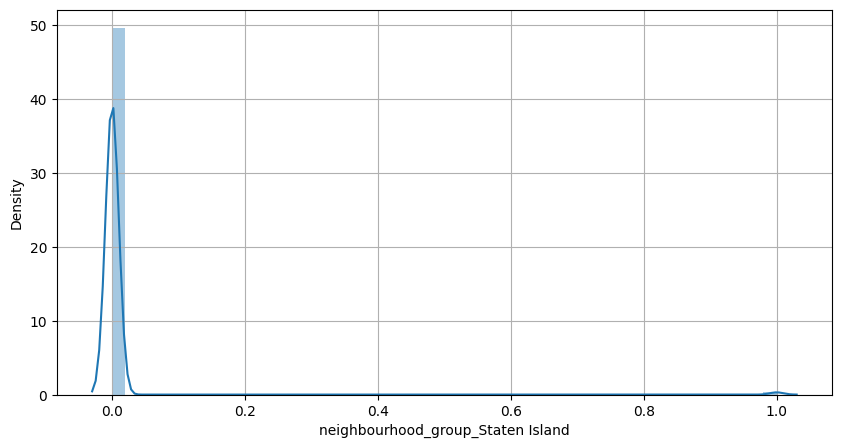



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



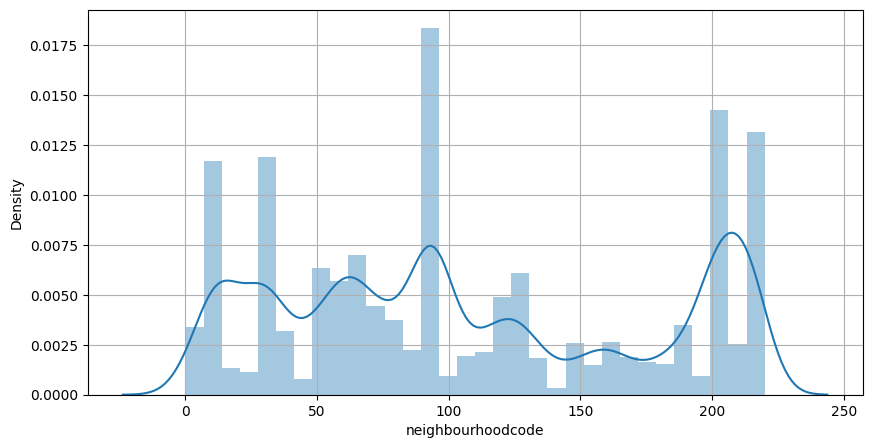



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



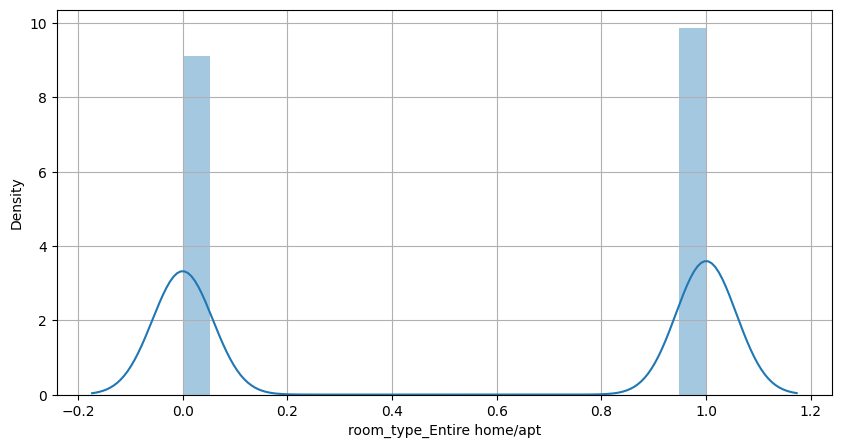



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



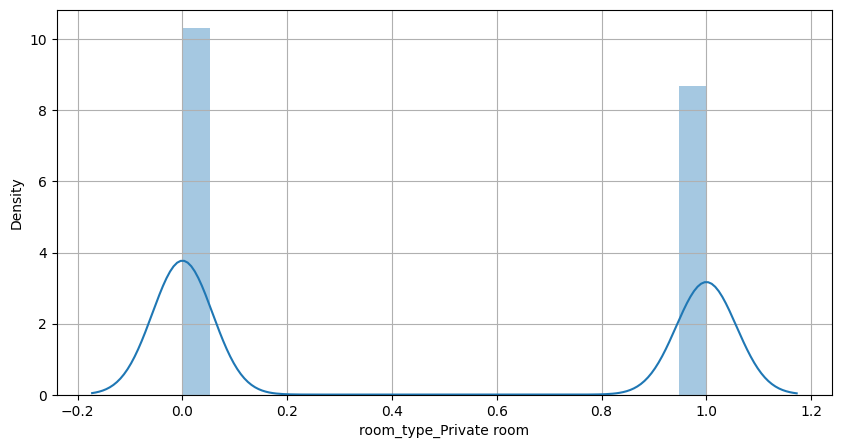



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



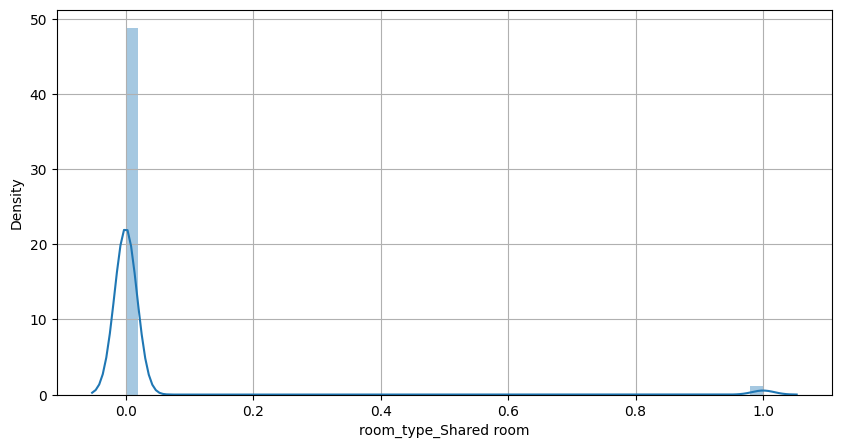

In [ ]:
def distribution(data,new_df):
  sns.distplot(data[new_df])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(df,i)
  plt.show()

# Correlation between the attributes

<Axes: >

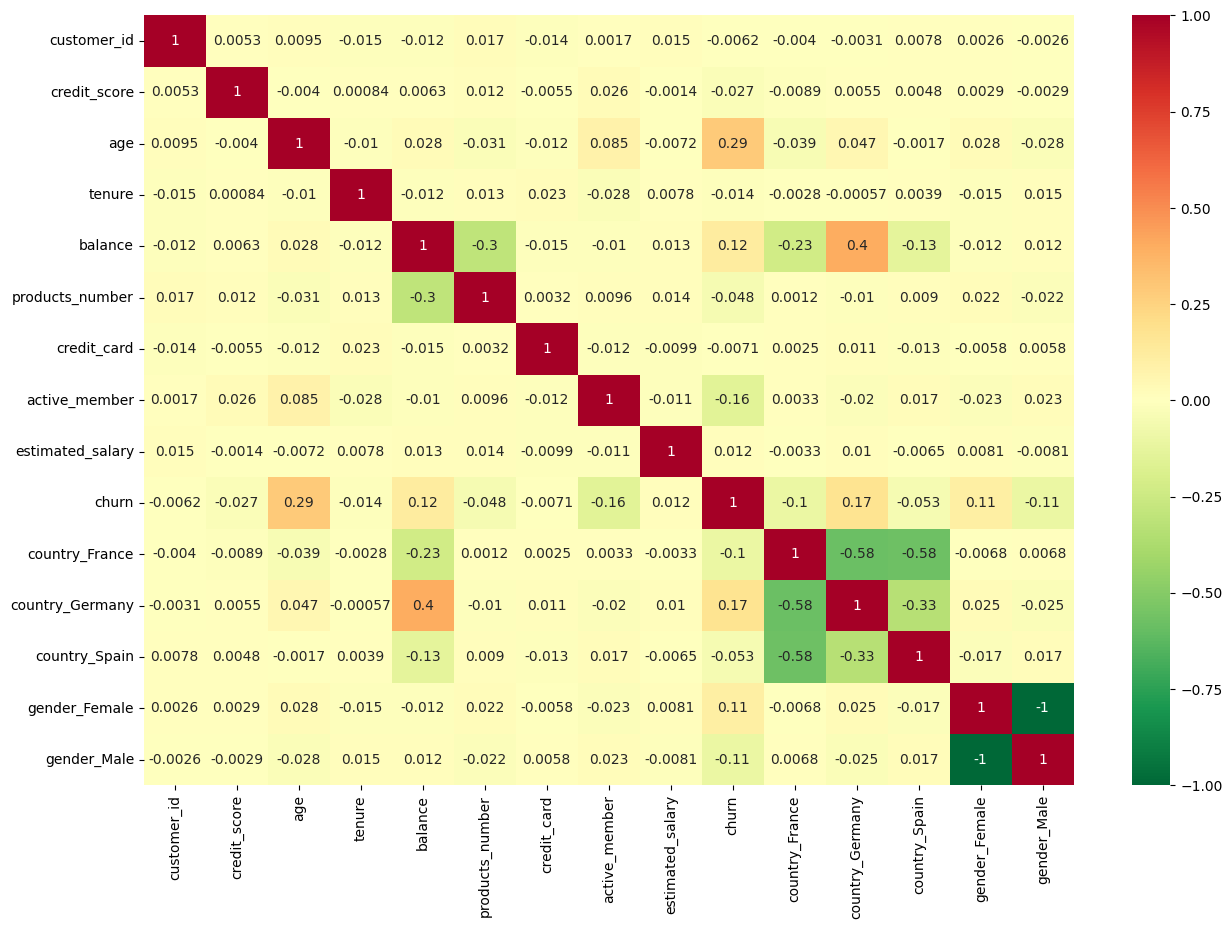

In [ ]:
plt.rcParams["figure.figsize"] = (15, 10)
sns.heatmap(
    new_df.corr(), annot=True, cmap="RdYlGn_r"
)  # Heatmap showing correlation between the attributes.

From the above heatmap we can conclude that highest correlation between the attributes is between country_germany and balance = 0.4 , age and churn = 0.29

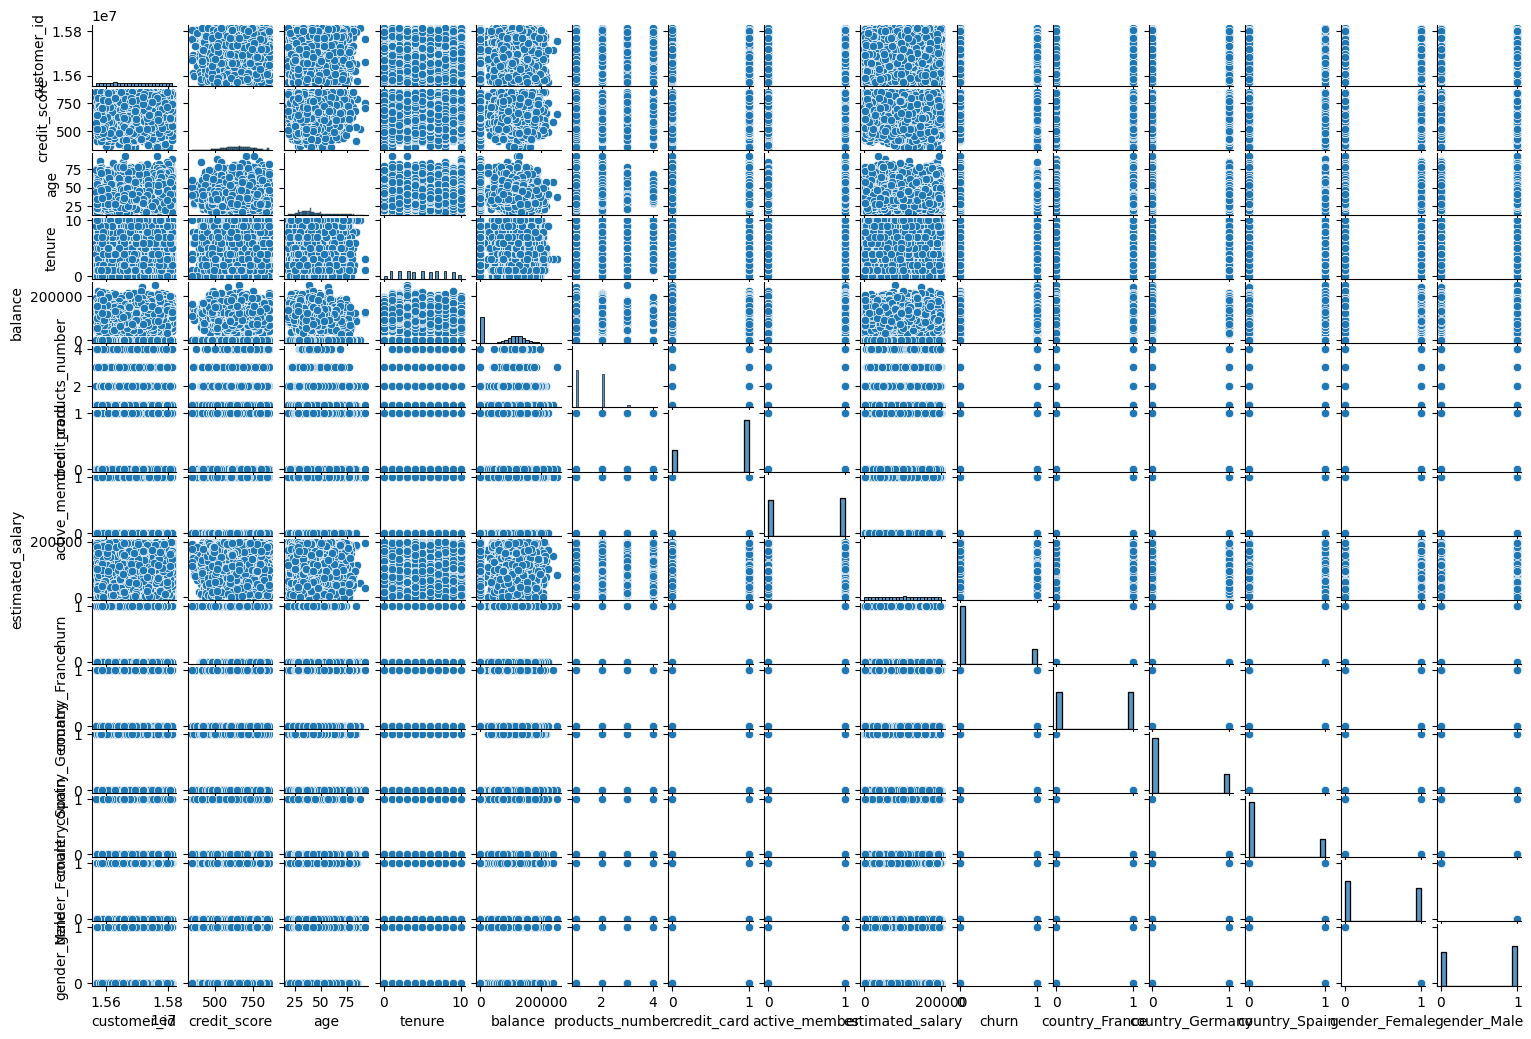

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
g = sns.pairplot(new_df)
g.fig.set_size_inches(15,10)

The above plot helping us to understand the pairwise relationship in our dataset

# Spliting Training and Testing Columns

We will split our dataset in Test and Train for further analysis

In Y-axis we will have out Target variable(i.e Churn) and rest all columns will be in X-axis

In [ ]:
X = new_df.drop(["churn"], axis=1)  # Training Feature
Y = new_df["churn"]  # Target

In [ ]:
print(X.head())

   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  country_France  \
0            1              1         101348.88               1   
1            0              1         112542.58               0   
2            1              0         113931.57               1   
3            0              0          93826.63               1   
4            1              1          79084.10               0   

   country_Germany  country_Spain  gender_Female  gender_Male  
0                0              0              1            0  
1                0            

In [ ]:
print(Y.head())

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# Fitting a Linear Model

In [ ]:
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

As our data set had all numerical values in columns so we have fitted linear regression model

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

# model = sm.OLS(y_train['Installs'], x_train[[ 'CategoryCode','Rating', 'Size', 'Reviews', 'Price','Type_0','Type_Free','Type_Paid','Content_Rating_Everyone','Content_Rating_Teen','Content_Rating_Unrated']]).fit()
model = sm.OLS(y_train, x_train).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          8.74e-310
Time:                        16:43:28   Log-Likelihood:                -3868.0
No. Observations:                9000   AIC:                             7762.
Df Residuals:                    8987   BIC:                             7854.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
customer_id      -5.051e-08   5.46e-08     -0.925      0.355   -1.57e-07    5.65e-08
credit_score     -9.678e-05   4.07e-05     -2.376      0.018      -0.000   -1.69e-05
age                  0.0112      0.000     29.944      0.000       0.011       0.012
tenure              -0.0013      0.001     -0.938      0.348      -0.004       0.001
balance           2.743e-07   7.27e-08      3.774      0.000    1.32e-07    4.17e-07
products_number     -0.0172      0.007     -2.415      0.016      -0.031      -0.003
credit_card         -0.0074      0.009     -0.865      0.387      -0.024       0.009
active_member       -0.1411      0.008    -17.873      0.000      -0.157      -0.126
estimated_salary  6.844e-08   6.82e-08      1.003      0.316   -6.53e-08    2.02e-07
country_France       0.2444      0.343      0.713      0.476      -0.427       0.916
country_Germany      0.3725      0.343      1.087      0.277      -0.299       1.044
country_Spain        0.2479      0.343      0.723      0.469      -0.424       0.920
gender_Female        0.4694      0.514      0.913      0.361      -0.538       1.477
gender_Male          0.3955      0.514      0.769      0.442      -0.612       1.403
==============================================================================
Omnibus:                     1314.156   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1982.368
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       3.196   Cond. No.                     1.09e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# P-Values
If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

Active_mumber

Product Number

balance

age 

credit score 


These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Installs).

# Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 1.145, 3.196 respectively.

# Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected

Value between 0 to 2 indicates that there is positive auto correlation detected

Value between 2 to 4 indicates that there is negative auto correlation detected

Our model has a DW score of 2.002 which could be interpreted as a Negative auto-correlation in the residuals of regression.

# Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 1982.368 which again re-inforces the interpretation we got from Skew and Kurtosis.

# Fit Tree Based Model

All the three tree based model fits well for the data set as we can see that decision tree has the accuracy of 84.60%, gradient boosting classifier has the accuracy of 86.50 and random forest regressor has squared error of 0.2

In [ ]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 84.60%


In [ ]:
# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 86.50%


In [ ]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

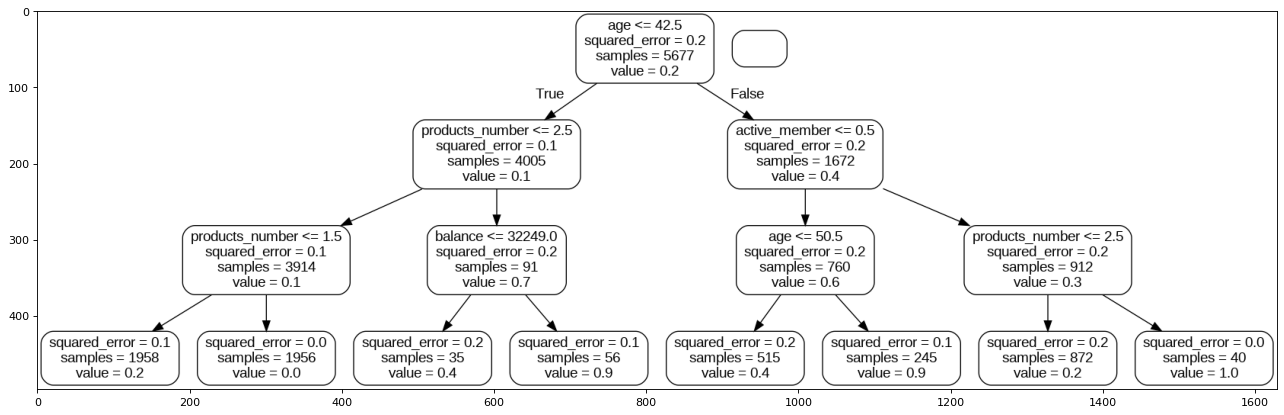

In [ ]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(20, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# What Approaches we have taken?

1. We took two sample dataset from the kaggle.

2. I started with checking the data type of our data and listed out the columns whoes data type can be changed.

3. Removed the unwanted columns which where not required in our Analysis.

4. Implemented One hot encoding in categorical columns so that the columns can be used in model where input numerical is required.

5. Implemented Cat Coding on columns as it had many unique values and One hot encoding was not very optimized method.



# Evaluation?

We saw the distribution plot, pairplot, heat map for checking the relations between our attributes.

We splitted our data into test and train and also implement ols model to check which attribute had significant influence on our target variable.

We also show which tree based model best fitted our dataset

# References

Chatgpt

Kaggle

https://colab.research.google.com/drive/1InvlVXPRxmcWtP_ISkwLosChpb68FaIJ

geeksforgeeks

https://colab.research.google.com/drive/1HBu35k55SiL6yD0B4cIkq8jVr44f6VJ2

https://github.com/panchalyash218/INFO6105/blob/main/Data_Preprocessing_for_Google_PlayStore_App.ipynb

# MIT License

Copyright (c) 2023 Yash Panchal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE